Read results of the simple model (where agents do not know the neighborhood availability) from __Argon__.

Note that the results are obtained based on models run only once

09-06-2017.

__Results seem to be fine__. Run multiple times for each __numAgents__ for simple models.

<hr>

In [73]:
import pickle
from itertools import combinations

In [72]:
import numpy as np
import scipy as sp
import pandas as pd

In [54]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<hr>

### Read pickled results

In [55]:
result_list = pickle.load(open('./results/simple-model-09062017.dump', 'rb'))
len(result_list)

11

In [56]:
print(result_list[0].keys())

dict_keys(['model', 'numAgents', 'type', 'agent'])


In [57]:
result_list[0]['model'].columns

Index(['agentsOnBoard'], dtype='object')

In [58]:
result_list[0]['agent'].columns

Index(['birthday', 'exitday', 'duration'], dtype='object')

#### Merge dataframes

In [59]:
all_model_df = pd.DataFrame(columns=['agentsOnBoard', 'timestamp', 'numAgents'])
all_agent_df = pd.DataFrame(columns=['birthday', 'exitday', 'duration', 'numAgents'])

In [60]:
for result in result_list:
    model_df, agent_df = result['model'], result['agent']
    model_df['timestamp'] = model_df.index
    model_df['numAgents'] = result['numAgents']
    agent_df['numAgents'] = result['numAgents']
    ## model
    all_model_df = pd.concat([all_model_df, model_df], ignore_index=True)
    ## agent
    all_agent_df = pd.concat([all_agent_df, agent_df], ignore_index=True)

In [96]:
print(all_model_df.shape)
print(all_model_df.dtypes)
print(all_model_df.query('numAgents == 50').head())

(11000, 4)
agentsOnBoard    object
timestamp        object
numAgents        object
density          object
dtype: object
     agentsOnBoard timestamp numAgents density
5000            50         0        50   0.005
5001           100         1        50    0.01
5002           150         2        50   0.015
5003           200         3        50    0.02
5004           244         4        50  0.0244


In [62]:
print(all_agent_df.shape)
print(all_agent_df.head())

(118366, 4)
  birthday  exitday  duration numAgents
0        0     99.0      99.0         1
1        0    112.0     112.0         1
2        1    140.0     139.0         1
3        2    170.0     168.0         1
4        3    155.0     152.0         1


### Model level

#### The number of agents born at each timestamp.

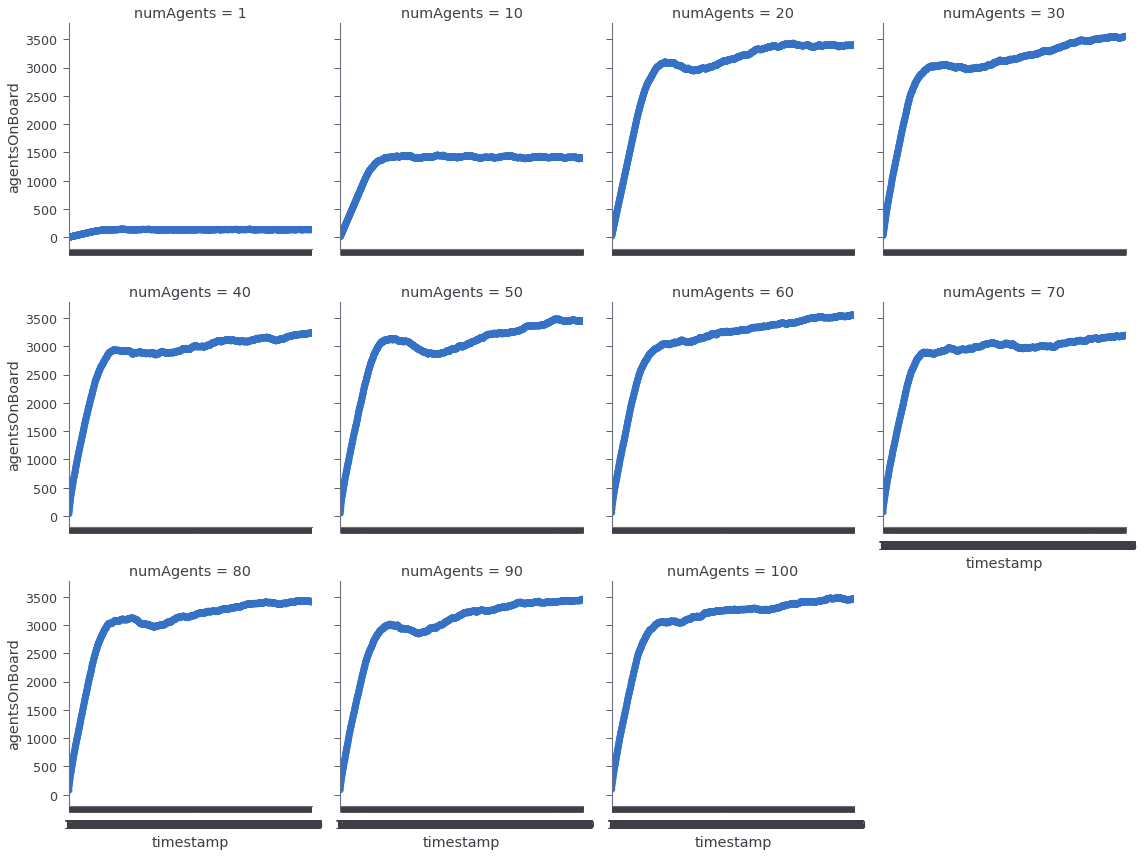

In [63]:
sns.factorplot(x='timestamp', y='agentsOnBoard', data=all_model_df, 
               col='numAgents', col_wrap=4)

In [64]:
max_agentsOnBoard = pd.DataFrame([(numAgents, max(df.agentsOnBoard)) for numAgents, df in all_model_df.groupby('numAgents')],
                                 columns=('numAgents', 'agentsOnBoard'))

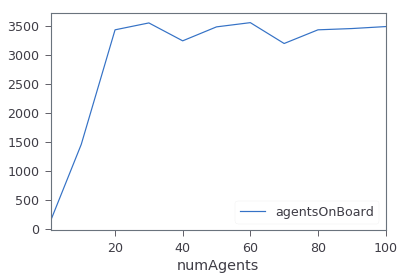

In [65]:
max_agentsOnBoard.plot(x='numAgents', y='agentsOnBoard')

#### Density

In [68]:
all_model_df['density'] = all_model_df['agentsOnBoard']/(100*100)
all_model_df['density']

0        0.0001
1        0.0002
2        0.0003
3        0.0004
4        0.0005
5        0.0006
6        0.0007
7        0.0008
8        0.0009
9         0.001
10       0.0011
11       0.0012
12       0.0013
13       0.0014
14       0.0015
15       0.0016
16       0.0017
17       0.0018
18       0.0019
19        0.002
20       0.0021
21       0.0022
22       0.0023
23       0.0024
24       0.0025
25       0.0026
26       0.0027
27       0.0028
28       0.0029
29        0.003
          ...  
10970    0.3448
10971    0.3447
10972     0.345
10973    0.3449
10974    0.3447
10975     0.345
10976    0.3444
10977    0.3451
10978     0.345
10979    0.3451
10980    0.3451
10981    0.3447
10982    0.3447
10983    0.3448
10984    0.3449
10985    0.3456
10986    0.3456
10987    0.3455
10988    0.3452
10989    0.3449
10990    0.3455
10991    0.3459
10992    0.3458
10993    0.3455
10994    0.3456
10995     0.346
10996     0.346
10997    0.3462
10998    0.3463
10999    0.3462
Name: density, Length: 1

<hr>

### Agent level

In [69]:
all_agent_df.columns

Index(['birthday', 'exitday', 'duration', 'numAgents'], dtype='object')

In [100]:
all_agent_df.dtypes

birthday      object
exitday      float64
duration     float64
numAgents     object
dtype: object

#### Duration

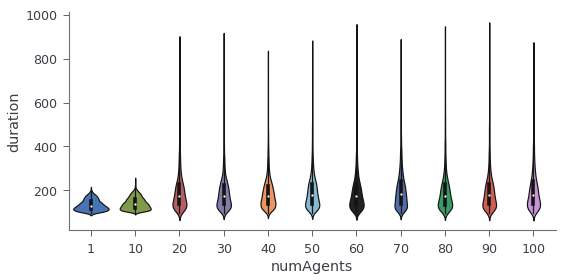

In [128]:
sns.factorplot(x='numAgents', y='duration', data=all_agent_df[~all_agent_df.duration.isnull()], 
               kind='violin', aspect=2)

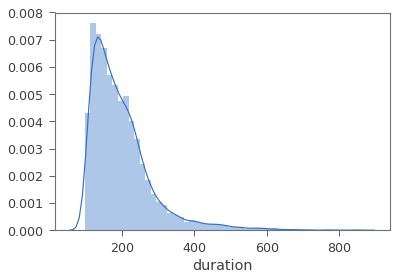

In [89]:
sns.distplot(all_agent_df[~all_agent_df.duration.isnull()].query("numAgents==50").duration)

Use `sns.FacetGrid` to plot distribution

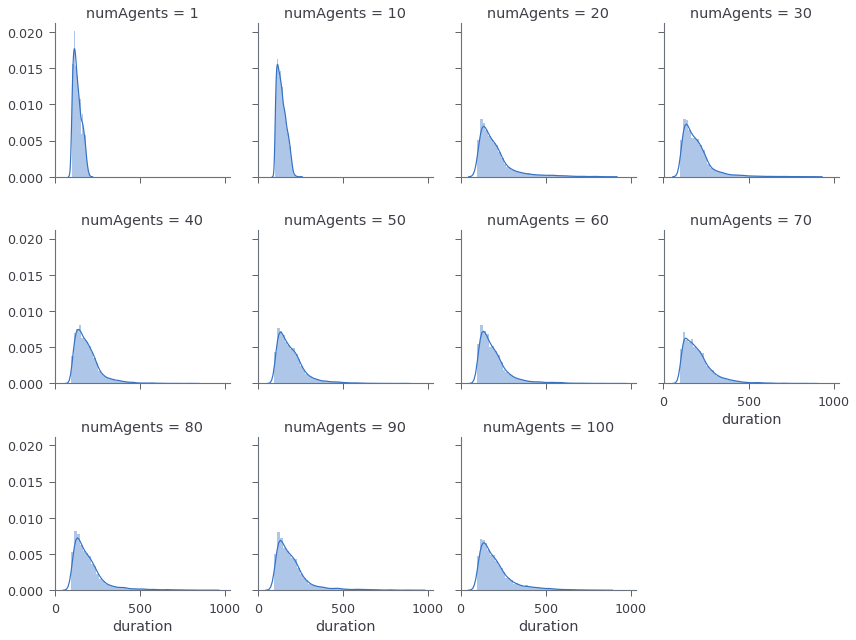

In [91]:
duration_p = sns.FacetGrid(all_agent_df, col="numAgents", col_wrap=4)
duration_p = duration_p.map(sns.distplot, "duration")

##### Similarity betwee each pair of models

In [107]:
len(list(combinations(all_agent_df.numAgents.unique(), 2)))
list(combinations(all_agent_df.numAgents.unique(), 2))

[(1, 10),
 (1, 20),
 (1, 30),
 (1, 40),
 (1, 50),
 (1, 60),
 (1, 70),
 (1, 80),
 (1, 90),
 (1, 100),
 (10, 20),
 (10, 30),
 (10, 40),
 (10, 50),
 (10, 60),
 (10, 70),
 (10, 80),
 (10, 90),
 (10, 100),
 (20, 30),
 (20, 40),
 (20, 50),
 (20, 60),
 (20, 70),
 (20, 80),
 (20, 90),
 (20, 100),
 (30, 40),
 (30, 50),
 (30, 60),
 (30, 70),
 (30, 80),
 (30, 90),
 (30, 100),
 (40, 50),
 (40, 60),
 (40, 70),
 (40, 80),
 (40, 90),
 (40, 100),
 (50, 60),
 (50, 70),
 (50, 80),
 (50, 90),
 (50, 100),
 (60, 70),
 (60, 80),
 (60, 90),
 (60, 100),
 (70, 80),
 (70, 90),
 (70, 100),
 (80, 90),
 (80, 100),
 (90, 100)]

In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.

Reference: [Wiki Page](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

In [98]:
sim_ks_df = pd.DataFrame(columns=['m1', 'm2', 'D', 'pval'])
sim_mannwhitneyu_df = pd.DataFrame(columns=['m1', 'm2', 'U', 'pval'])
#sim_scorr_df = pd.DataFrame(columns=['m1', 'm2', 'corr', 'pval'])

In [104]:
for m1, m2 in combinations(all_agent_df.numAgents.unique(), 2):
    m1_df = all_agent_df.query("numAgents == @m1")
    m2_df = all_agent_df.query("numAgents == @m2")
    ##
    D, pval = sp.stats.ks_2samp(m1_df.duration, m2_df.duration)
    sim_ks_df = sim_ks_df.append({'m1': m1, 'm2': m2, 'D': D, 'pval': pval}, ignore_index=True)
    ##
    U, pval = sp.stats.mannwhitneyu(m1_df.duration, m2_df.duration)
    sim_mannwhitneyu_df=sim_mannwhitneyu_df.append({'m1': m1, 'm2': m2, 'U': U, 'pval': pval}, ignore_index=True)

In [124]:
numAgents_list = all_agent_df.numAgents.unique()
sim_ks_matrix = np.zeros((len(numAgents_list), len(numAgents_list)), dtype=float)
sim_mw_matrix = np.zeros((len(numAgents_list), len(numAgents_list)), dtype=float)
for i in range(len(numAgents_list)):
    for j in range(i, len(numAgents_list)):
        m1, m2 = numAgents_list[i], numAgents_list[j]
        if m1 == m2:
            sim_ks_matrix[i,j] = sp.stats.ks_2samp(all_agent_df.query("numAgents == @m1").duration,
                                                   all_agent_df.query("numAgents == @m2").duration)[0]
            sim_mw_matrix[i,j] = sp.stats.mannwhitneyu(all_agent_df.query("numAgents == @m1").duration,
                                                       all_agent_df.query("numAgents == @m2").duration)[0]
        else:
            sim_ks_matrix[i,j] = sim_ks_df.query("m1==@m1 and m2==@m2").pval.iloc[0]
            sim_mw_matrix[i,j] = sim_mannwhitneyu_df.query("m1==@m1 and m2==@m2").pval.iloc[0]

In [125]:
print(sim_ks_matrix.shape)
sim_mw_matrix.shape

(11, 11)


(11, 11)

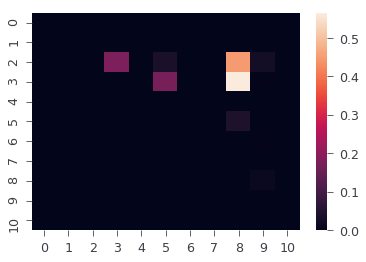

In [126]:
sns.heatmap(sim_ks_matrix)

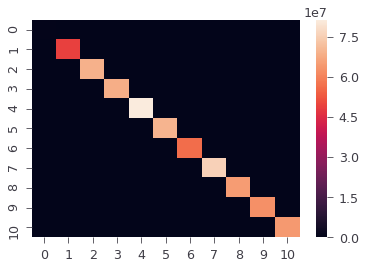

In [127]:
sns.heatmap(sim_mw_matrix)